In [1]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

OCR text: Monday 1st October
Vegetarian Day —
\ Meat Free Monday in Rooftops
Tuesday 2nd October ‘a
street Pop Up Black History Month a
Thursday 4th October
Breakfast Pop Up "Omelette"
Tuesday Sth October
Street Pop Up " Pho Soup"
Wednesday 10th October
\ "Lewis 8 Baker" Hero Product Sampling Day
mn Thursday 11th October
Breakfast Pop Up "American Pancakes Live”
Thursday 18th October
“ Breakfast Pop Up "Omelette"
Friday 18th October
Celebrating Apple Day (21st) Get you Apple for Free!
Tuesday 23rd October
Street Pop Up "Curry"
Wednesday 24th October
"Stacks Gym Food Recipe in Cornerstones
Thursday 25th October
Breakfast Pop Up "Burritos"
Monday 28th October
UK Sausages Week
Tuesday 30th October
Street Pop Up "Black History Month"
Wednesday 3ist
16 Halloween in Cornerstones

Celebratin,


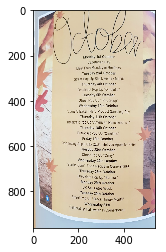

In [4]:
def run_ocr(img_path, rotate=None):
    img=Image.open(img_path)
    
    if rotate:
        img = img.rotate(rotate)

    ocr_text = pytesseract.image_to_string(img, lang='eng')
    print(f"OCR text: {ocr_text}")

    plt.imshow(np.asarray(img))
    return ocr_text

img_path = '../../data/october_food.png'
text = run_ocr(img_path)

In [25]:
def is_date(text):
    tokens = text.split() + [None]
    return tokens[0] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def text_to_menu_items(text):
    text_lines = text.split('\n')

    menu_items_indices = []
    for index, line in enumerate(text_lines):
        if is_date(line):
            menu_items_indices.append(index)
    
    menu_items = []
    for index in range(len(menu_items_indices)-1):
        start_index, end_index = menu_items_indices[index:index+2]
        date_component = text_lines[start_index]
        food_component = " ".join(text_lines[start_index+1:end_index])
        menu_items.append((date_component, food_component))
    return menu_items

text_to_menu_items(text)

[('Monday 1st October', 'Vegetarian Day — \\ Meat Free Monday in Rooftops'),
 ('Tuesday 2nd October ‘a', 'street Pop Up Black History Month a'),
 ('Thursday 4th October', 'Breakfast Pop Up "Omelette"'),
 ('Tuesday Sth October', 'Street Pop Up " Pho Soup"'),
 ('Wednesday 10th October',
  '\\ "Lewis 8 Baker" Hero Product Sampling Day mn Thursday 11th October Breakfast Pop Up "American Pancakes Live”'),
 ('Thursday 18th October', '“ Breakfast Pop Up "Omelette"'),
 ('Friday 18th October',
  'Celebrating Apple Day (21st) Get you Apple for Free!'),
 ('Tuesday 23rd October', 'Street Pop Up "Curry"'),
 ('Wednesday 24th October', '"Stacks Gym Food Recipe in Cornerstones'),
 ('Thursday 25th October', 'Breakfast Pop Up "Burritos"'),
 ('Monday 28th October', 'UK Sausages Week'),
 ('Tuesday 30th October', 'Street Pop Up "Black History Month"')]